In [1]:
# import required libraries

import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset= pd.read_csv(r'C:\Users\Vindhya Prakash\OneDrive\Desktop\Highradius\H2HBABBA2718.csv')

## Data Preprocessing

In [3]:
# divide the dataset into two parts one where 'clear_date is not null and another where clear date is null'

df= dataset[dataset['clear_date'].notnull()]      #--'Clear_date = Not NULL'



# This data will be used to when working on final data set 
dm = dataset[dataset['clear_date'].isnull()]           #--'Clear_date = NULL'          
main_data = dataset[dataset['clear_date'].isnull()]    #--'Clear_date = NULL'

In [4]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,16-12-2019 00:00,2019,1930217703,04-12-2019,20191204,20191204,20191219,USD,RV,1,NaN,41546.19,20191204,NAH4,1.930218e+09,0
1,U001,200712349,FOOD corp,30-04-2019 00:00,2019,1929148282,19-04-2019,20190415,20190419,20190504,USD,RV,1,NaN,4822.09,20190419,NAA8,1.929148e+09,0
2,U001,200744019,TARG corp,09-04-2019 00:00,2019,1928993415,21-03-2019,20190319,20190321,20190405,USD,RV,1,NaN,18614.83,20190321,NAA8,1.928993e+09,0
3,U001,200749782,KROG trust,28-01-2020 00:00,2020,1930427600,22-01-2020,20200122,20200122,20200206,USD,RV,1,NaN,932.29,20200122,NAA8,1.930428e+09,0
4,U002,200825136,COLOME trust,01-02-2019 00:00,2019,1990563241,01-01-2019,20181229,20190101,20190131,USD,RV,1,NaN,46487.32,20190101,NA38,1.990563e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,U001,200277896,ASSOCI corporation,21-05-2019 00:00,2019,1929207930,25-04-2019,20190425,20190425,20190505,USD,RV,1,NaN,73077.12,20190425,NA10,1.929208e+09,0
49992,U001,200769623,WAL-MAR llc,15-10-2019 00:00,2019,1929964400,04-10-2019,20191004,20191004,20191019,USD,RV,1,NaN,47963.01,20191004,NAH4,1.929964e+09,0
49993,U001,200353024,DECA co,01-08-2019 00:00,2019,1929646086,22-07-2019,20190722,20190722,20190808,USD,RV,1,NaN,4430.16,20190716,NAM4,1.929646e+09,0
49995,U001,200418007,AM us,23-09-2019 00:00,2019,1929822168,06-09-2019,20190903,20190906,20190921,USD,RV,1,NaN,1491.21,20190906,NAA8,1.929822e+09,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  int64  
 5   doc_id                  40000 non-null  int64  
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  int64  
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  posting_id              40000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       40000 non-null

In [6]:
# since area_bussiness is constant feature hence we will drop this column

df = df.drop('area_business', axis=1)
dm = dm.drop('area_business', axis=1)

In [7]:
# to check how many unique values are present in a particular column

df.nunique()

business_code                 6
cust_number                1022
name_customer              3900
clear_date                  403
buisness_year                 2
doc_id                    39116
posting_date                423
document_create_date        425
document_create_date.1      423
due_in_date                 494
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         35630
baseline_create_date        430
cust_payment_terms           71
invoice_id                39110
isOpen                        1
dtype: int64

In [8]:
# This line of code returns the number of missing values in each column

df.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                6
isOpen                    0
dtype: int64

In [9]:
# we are droping constant features
df = df.drop('posting_id', axis=1)
dm = dm.drop('posting_id', axis=1)

df = df.drop('isOpen', axis=1)
dm = dm.drop('isOpen', axis=1)

df = df.drop('invoice_id', axis=1)
dm = dm.drop('invoice_id', axis=1)

In [10]:
# remove duplicates from the datasets
df = df.loc[:,~df.columns.duplicated()]

dm = dm.loc[:,~dm.columns.duplicated()]

In [11]:
# changing object datatype to string datatype

df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'].astype(str))
df['document_create_date']=pd.to_datetime(df['document_create_date'].astype(str))
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'].astype(str))
df['clear_date']=pd.to_datetime(df['clear_date'].astype(str))
df['due_in_date']=pd.to_datetime(df['due_in_date'].astype(str))
df['posting_date']=pd.to_datetime(df['posting_date'].astype(str))




dm['document_create_date.1']=pd.to_datetime(dm['document_create_date.1'].astype(str))
dm['document_create_date']=pd.to_datetime(dm['document_create_date'].astype(str))
dm['baseline_create_date']=pd.to_datetime(dm['baseline_create_date'].astype(str))
dm['clear_date']=pd.to_datetime(dm['clear_date'].astype(str))
dm['due_in_date']=pd.to_datetime(dm['due_in_date'].astype(str))
dm['posting_date']=pd.to_datetime(dm['posting_date'].astype(str))

In [12]:
df.sort_values('posting_date')

dm.sort_values('posting_date')

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
37793,U001,200726979,BJ'S corp,NaT,2020,1930584179,2020-01-03,2020-02-29,2020-03-01,2020-03-16,USD,RV,153.35,2020-03-01,NAA8
20087,U001,200769623,WAL-MAR corp,NaT,2020,1930584712,2020-01-03,2020-02-29,2020-03-01,2020-03-16,USD,RV,4885.80,2020-03-01,NAH4
38700,U001,200769623,WAL-MAR llc,NaT,2020,1930583626,2020-01-03,2020-02-29,2020-03-01,2020-03-16,USD,RV,12939.91,2020-03-01,NAH4
743,U001,200744019,TARG trust,NaT,2020,1930584864,2020-01-03,2020-02-29,2020-03-01,2020-03-16,USD,RV,9441.05,2020-03-01,NAA8
7291,U001,200769623,WAL-MAR trust,NaT,2020,1930580971,2020-01-03,2020-02-29,2020-03-01,2020-03-16,USD,RV,14781.23,2020-03-01,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25984,U001,200769623,WAL-MAR co,NaT,2020,1930874992,2020-12-05,2020-05-07,2020-05-12,2020-05-27,USD,RV,7227.36,2020-05-12,NAH4
10057,U001,200769623,WAL-MAR associates,NaT,2020,1930892045,2020-12-05,2020-05-12,2020-05-12,2020-05-27,USD,RV,535.00,2020-05-12,NAH4
26805,U001,200769623,WAL-MAR,NaT,2020,1930885637,2020-12-05,2020-05-11,2020-05-12,2020-05-27,USD,RV,22549.83,2020-05-12,NAH4
9961,U001,200769623,WAL-MAR corporation,NaT,2020,1930884657,2020-12-05,2020-05-10,2020-05-12,2020-05-27,USD,RV,8941.12,2020-05-12,NAH4


In [13]:
# Converting USD and CAD 
# 1 CAD = 0.81 USD

x = dataset[dataset['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    dataset['total_open_amount'][i] = 0.81*x[i]


data = dataset.drop(columns=['invoice_currency'])

x = df[df['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    df['total_open_amount'][i] = 0.81*x[i]
#df = df.drop(columns=['invoice_currency'])

In [14]:
# Converting USD and CAD 
# 1 CAD = 0.81 USD

x = dataset[dataset['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    dataset['total_open_amount'][i] = 0.81*x[i]


data1 = dataset.drop(columns=['invoice_currency'])

x = dm[dm['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    dm['total_open_amount'][i] = 0.81*x[i]
#df = df.drop(columns=['invoice_currency'])

In [15]:
df["cust_number"]

0        200769623
1        200712349
2        200744019
3        200749782
4        200825136
           ...    
49991    200277896
49992    200769623
49993    200353024
49995    200418007
49998    200719526
Name: cust_number, Length: 40000, dtype: object

In [16]:
# 'Cust_number' features contains some ambiguity hence I am dropping few column which are irrelevant
df["cust_number"] = pd.to_numeric(df['cust_number'],errors='coerce') # invalid parsing will be set as NaN
df = df.dropna()

In [17]:
df.shape

(38649, 15)

In [18]:
# Storing the difference of clear_date and due_in_date in another column that is our target feature.

df['target'] = (df['clear_date'] - df['due_in_date']).dt.days
df = df.drop('clear_date', axis=1)

In [19]:
dm['target'] = (dm['clear_date'] - dm['due_in_date']).dt.days
dm = dm.drop('clear_date', axis=1)

In [20]:
# Breaking 'posting_date' into month, days and weekday

df['post_month'] = df['posting_date'].dt.month
df['post_day'] = df['posting_date'].dt.day
df['post_year_weeksdays'] = df['posting_date'].dt.weekday
df = df.drop('posting_date',axis=1)

In [21]:
dm['post_month'] = dm['posting_date'].dt.month
dm['post_day'] = dm['posting_date'].dt.day
dm['post_year_weeksdays'] = dm['posting_date'].dt.weekday
dm = dm.drop('posting_date',axis=1)

In [22]:
# Breaking 'document_create_date' into month, days and weekday
df['document_create_month'] = df['document_create_date'].dt.month
df['document_create_day'] = df['document_create_date'].dt.day
df['document_create_weeksdays'] = df['document_create_date'].dt.weekday
df = df.drop('document_create_date',axis=1)

In [23]:
dm['document_create_month'] = dm['document_create_date'].dt.month
dm['document_create_day'] = dm['document_create_date'].dt.day
dm['document_create_weeksdays'] = dm['document_create_date'].dt.weekday
dm = dm.drop('document_create_date',axis=1)

In [24]:
# Breaking 'document_create_date.1' into month, days and weekday
df['document_create1_month'] = df['document_create_date.1'].dt.month
df['document_create1_day'] = df['document_create_date.1'].dt.day
df['document_create1_weeksdays'] = df['document_create_date.1'].dt.weekday
df = df.drop('document_create_date.1',axis=1)

In [25]:
dm['document_create1_month'] = dm['document_create_date.1'].dt.month
dm['document_create1_day'] = dm['document_create_date.1'].dt.day
dm['document_create1_weeksdays'] = dm['document_create_date.1'].dt.weekday
dm = dm.drop('document_create_date.1',axis=1)

In [26]:
# Breaking 'due_in_date' into month, days and weekday
#df['due_in_date_month'] = df['due_in_date'].dt.month
#df['due_in_date_day'] = df['due_in_date'].dt.day
#df['due_in_date_year'] = df['due_in_date'].dt.year
df = df.drop('due_in_date',axis=1)

In [27]:
dm = dm.drop('due_in_date',axis=1)

In [28]:
# Breaking 'baseline_create_date' into month, days and weekday
df['baseline_create_date_month'] = df['baseline_create_date'].dt.month
df['baseline_create_date_day'] = df['baseline_create_date'].dt.day
df['baseline_create_date_year'] = df['baseline_create_date'].dt.year
df = df.drop('baseline_create_date',axis=1)

In [29]:
# Breaking 'baseline_create_date' into month, days and weekday
dm['baseline_create_date_month'] = dm['baseline_create_date'].dt.month
dm['baseline_create_date_day'] = dm['baseline_create_date'].dt.day
dm['baseline_create_date_year'] = dm['baseline_create_date'].dt.year
dm = dm.drop('baseline_create_date',axis=1)

In [30]:
# remove duplicate columns
df = df.loc[:,~df.columns.duplicated()] 

In [31]:
dm = dm.loc[:,~dm.columns.duplicated()] 

## Split Data into Training, Testing and Validation set.

In [32]:
# Seperating target data from dataframe and storing them into another dataframe

X = df.drop(['target'], axis=1) 
y = df['target']

In [33]:
# Spliting X, y again.

from sklearn.model_selection import train_test_split
X_train, X_test_train, y_train, y_test_train = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)
X_train.shape, X_test_train.shape

((30919, 21), (7730, 21))

In [34]:
# Again Spliting 

X_val, X_test, y_val, y_test = train_test_split(X_test_train, y_test_train, test_size = 0.3, random_state = 0, shuffle=False)
X_val.shape, X_test.shape

((5411, 21), (2319, 21))

## Feature Engineering

## ---> Started with Label Encoding of Categorical Features.

In [35]:
# importing Label Encoding libraries from sklearn 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [36]:
# Label encoding of 'bussiness_code' feature

X_train['business_code']= label_encoder.fit_transform(X_train['business_code'])
X_test['business_code']= label_encoder.fit_transform(X_test['business_code'])
X_val['business_code']= label_encoder.fit_transform(X_val['business_code'])
dm['business_code']= label_encoder.fit_transform(dm['business_code'])
X_train['business_code'].unique()

array([1, 2, 0, 5, 3, 4])

In [37]:
# Label encoding of 'name_customer' feature

X_train['name_customer']= label_encoder.fit_transform(X_train['name_customer'])
X_test['name_customer']= label_encoder.fit_transform(X_test['name_customer'])
X_val['name_customer']= label_encoder.fit_transform(X_val['name_customer'])
dm['name_customer']= label_encoder.fit_transform(dm['name_customer'])
X_train['name_customer'].unique()

array([3285, 1102, 3046, ...,  165, 1053, 2035])

In [38]:
# Label encoding of 'cust_payment_terms' feature

X_train['cust_payment_terms']= label_encoder.fit_transform(X_train['cust_payment_terms'])
X_test['cust_payment_terms']= label_encoder.fit_transform(X_test['cust_payment_terms'])
X_val['cust_payment_terms']= label_encoder.fit_transform(X_val['cust_payment_terms'])
dm['cust_payment_terms']= label_encoder.fit_transform(dm['cust_payment_terms'])
X_train['cust_payment_terms'].unique()

array([34, 20, 14, 36,  6, 25, 22, 28,  4, 49, 62, 13, 65, 21, 61, 59, 38,
       33, 52, 26, 30, 66, 10, 57, 44, 64, 15, 32, 35, 29, 51,  3,  2, 58,
        1, 60, 63, 24, 12,  7, 67, 56, 16, 54, 46, 11, 17, 23, 31, 37, 39,
       48, 55, 41, 47, 27, 53, 45, 19, 43,  8, 50, 18,  0, 40, 42,  5,  9])

In [39]:
# Label encoding of 'document type' feature

X_train['document type']= label_encoder.fit_transform(X_train['document type'])
X_test['document type']= label_encoder.fit_transform(X_test['document type'])
X_val['document type']= label_encoder.fit_transform(X_val['document type'])
dm['document type']= label_encoder.fit_transform(dm['document type'])
X_train['document type'].unique()

array([0, 1])

In [40]:
# Label encoding of 'business_year' feature

X_train['buisness_year']= label_encoder.fit_transform(X_train['buisness_year'])
X_test['buisness_year']= label_encoder.fit_transform(X_test['buisness_year'])
X_val['buisness_year']= label_encoder.fit_transform(X_val['buisness_year'])
dm['buisness_year']= label_encoder.fit_transform(dm['buisness_year'])
X_train['buisness_year'].unique()

array([0, 1], dtype=int64)

In [41]:
# Label encoding of 'invoice_currency' feature

X_train['invoice_currency']= label_encoder.fit_transform(X_train['invoice_currency'])
X_test['invoice_currency']= label_encoder.fit_transform(X_test['invoice_currency'])
X_val['invoice_currency']= label_encoder.fit_transform(X_val['invoice_currency'])
dm['invoice_currency']= label_encoder.fit_transform(dm['invoice_currency'])
X_train['invoice_currency'].unique()

array([1, 0])

In [42]:
# Label encoding of 'baseline_create_date_year' feature

X_train['baseline_create_date_year']= label_encoder.fit_transform(X_train['baseline_create_date_year'])
X_test['baseline_create_date_year']= label_encoder.fit_transform(X_test['baseline_create_date_year'])
X_val['baseline_create_date_year']= label_encoder.fit_transform(X_val['baseline_create_date_year'])
dm['baseline_create_date_year']= label_encoder.fit_transform(dm['baseline_create_date_year'])
X_train['baseline_create_date_year'].unique()

array([1, 2, 0], dtype=int64)

In [43]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,...,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
0,1,200769623.0,3285,0,1930217703,1,0,41546.19,34,4,...,4,12,4,2,12,4,2,12,4,1
1,1,200712349.0,1102,0,1929148282,1,0,4822.09,20,4,...,4,4,15,0,4,19,4,4,19,1
2,1,200744019.0,3046,0,1928993415,1,0,18614.83,20,3,...,3,3,19,1,3,21,3,3,21,1
3,1,200749782.0,1698,1,1930427600,1,0,932.29,20,1,...,2,1,22,2,1,22,2,1,22,2
4,2,200825136.0,626,0,1990563241,1,0,46487.32,14,1,...,1,12,29,5,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,1,200769623.0,3282,0,1929159930,1,0,17546.75,34,4,...,3,4,17,2,4,18,3,4,18,1
39987,1,200769623.0,3277,0,1930187357,1,0,16591.94,34,11,...,6,11,23,5,11,24,6,11,24,1
39989,1,200762301.0,467,0,1929759997,1,0,51966.49,25,8,...,1,8,18,6,8,20,1,8,20,1
39990,1,200915438.0,1294,1,1930464113,1,0,12720.49,20,4,...,3,2,1,5,2,4,1,2,4,2


## Second step is standarisation or normalisation of required features.


In [44]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
#X_train_stand = X_train.copy()
#X_test_stand = X_test.copy()

# numerical features
num_cols = ['cust_number','doc_id','name_customer','cust_payment_terms','post_year_weeksdays','document_create_month','document_create_day'
           ,'document_create_weeksdays', 'document_create1_month' , 'document_create1_weeksdays' ,'document_create1_day','baseline_create_date_day'
           , 'baseline_create_date_month', 'post_month', 'post_day', 'total_open_amount']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])
    
    X_val[i] = scale.transform(X_val[[i]])

In [45]:
# This is how my X_train looks like , Since all features are in either float or int it will be easy to visualise our data.
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,...,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
0,1,0.366490,1.061873,0,-0.278878,1,0,0.266748,0.788798,-0.586956,...,0.660849,1.787629,-1.318313,-0.322117,1.793801,-1.341391,-0.348748,1.792756,-1.294288,1
1,1,0.364241,-0.834721,0,-0.282487,1,0,-0.694494,-0.515488,-0.586956,...,0.660849,-0.498983,-0.055676,-1.427936,-0.495981,0.385024,0.750150,-0.496732,0.411591,1
2,1,0.365484,0.854229,0,-0.283010,1,0,-0.333473,-0.515488,-0.876575,...,0.132419,-0.784810,0.403465,-0.875027,-0.782204,0.615213,0.200701,-0.782918,0.639041,1
3,1,0.365711,-0.316915,1,-0.278169,1,0,-0.796309,-0.515488,-1.455813,...,-0.396010,-1.356463,0.747821,-0.322117,-1.354649,0.730307,-0.348748,-1.355290,0.752766,2
4,2,0.368669,-1.248271,0,-0.075192,1,0,0.396081,-1.074467,-1.455813,...,-0.924440,1.787629,1.551317,1.336610,-1.354649,-1.686674,-0.898197,-1.355290,-1.635464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,1,0.366490,1.059267,0,-0.282448,1,0,-0.361430,0.788798,-0.586956,...,0.132419,-0.498983,0.173895,-0.322117,-0.495981,0.269930,0.200701,-0.496732,0.297865,1
39987,1,0.366490,1.054922,0,-0.278980,1,0,-0.386422,0.788798,1.440376,...,1.717708,1.501803,0.862606,1.336610,1.507578,0.960496,1.849049,1.506570,0.980217,1
39989,1,0.366202,-1.386410,0,-0.280423,1,0,0.539497,-0.049672,0.571519,...,-0.924440,0.644323,0.288680,1.889519,0.648910,0.500118,-0.898197,0.648012,0.525316,1
39990,1,0.372214,-0.667911,1,-0.278046,1,0,-0.487756,-0.515488,-0.586956,...,0.132419,-1.070636,-1.662668,1.336610,-1.068427,-1.341391,-0.898197,-1.069104,-1.294288,2


## EDA

<AxesSubplot:xlabel='target', ylabel='Density'>

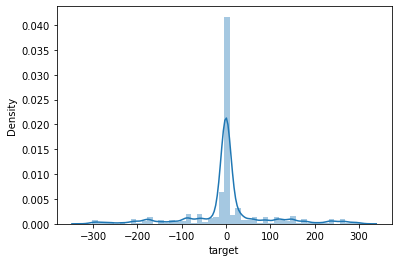

In [46]:
# Distribution Diagram of our target feature.
# This diagram is not skewed hence I am not using using any transformation function like logarithmic ..etc

import seaborn as sns
sns.distplot(df['target'])

### Note

In [47]:
# Was Tryig to remove my outliers but although it is improving my mse error but it is not 
# a good practice therefore I dropped thsi idea.
# Removing Outliers because my dataset is very ambiguous and it is giving high MSE value

#Q1 = df['target'].quantile(0.25)
#Q3 = df['target'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#df['target'] = df['target'][~((df['target'] < (Q1 - 20* IQR)) |(df['target'] > (Q3 + 20* IQR)))]

<AxesSubplot:xlabel='post_day', ylabel='Density'>

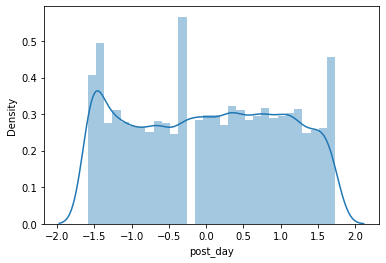

In [48]:
# Distribution Diagram of our post_day feature.

sns.distplot(X_train['post_day'])

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

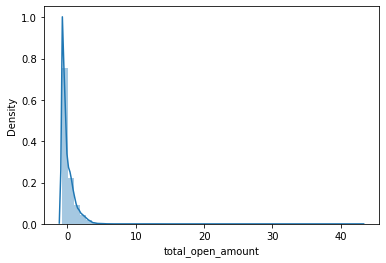

In [49]:
# Distribution Diagram of our 'total_open_amount' feature.

sns.distplot(X_train['total_open_amount'])

In [50]:
# As we can see that the distribution is slightly right skewed therefore I have applied log transformation.

In [51]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,...,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
0,1,0.366490,1.061873,0,-0.278878,1,0,0.266748,0.788798,-0.586956,...,0.660849,1.787629,-1.318313,-0.322117,1.793801,-1.341391,-0.348748,1.792756,-1.294288,1
1,1,0.364241,-0.834721,0,-0.282487,1,0,-0.694494,-0.515488,-0.586956,...,0.660849,-0.498983,-0.055676,-1.427936,-0.495981,0.385024,0.750150,-0.496732,0.411591,1
2,1,0.365484,0.854229,0,-0.283010,1,0,-0.333473,-0.515488,-0.876575,...,0.132419,-0.784810,0.403465,-0.875027,-0.782204,0.615213,0.200701,-0.782918,0.639041,1
3,1,0.365711,-0.316915,1,-0.278169,1,0,-0.796309,-0.515488,-1.455813,...,-0.396010,-1.356463,0.747821,-0.322117,-1.354649,0.730307,-0.348748,-1.355290,0.752766,2
4,2,0.368669,-1.248271,0,-0.075192,1,0,0.396081,-1.074467,-1.455813,...,-0.924440,1.787629,1.551317,1.336610,-1.354649,-1.686674,-0.898197,-1.355290,-1.635464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,1,0.366490,1.059267,0,-0.282448,1,0,-0.361430,0.788798,-0.586956,...,0.132419,-0.498983,0.173895,-0.322117,-0.495981,0.269930,0.200701,-0.496732,0.297865,1
39987,1,0.366490,1.054922,0,-0.278980,1,0,-0.386422,0.788798,1.440376,...,1.717708,1.501803,0.862606,1.336610,1.507578,0.960496,1.849049,1.506570,0.980217,1
39989,1,0.366202,-1.386410,0,-0.280423,1,0,0.539497,-0.049672,0.571519,...,-0.924440,0.644323,0.288680,1.889519,0.648910,0.500118,-0.898197,0.648012,0.525316,1
39990,1,0.372214,-0.667911,1,-0.278046,1,0,-0.487756,-0.515488,-0.586956,...,0.132419,-1.070636,-1.662668,1.336610,-1.068427,-1.341391,-0.898197,-1.069104,-1.294288,2


In [52]:
from matplotlib import pyplot as plt
#X_train['total_open_amount'] = np.log(X_train['total_open_amount'])
#X_test['total_open_amount'] = np.log(X_test['total_open_amount'])
#X_val['total_open_amount'] = np.log(X_val['total_open_amount'])
#sns.distplot(X_train['total_open_amount'])
#fig = plt.figure()

In [53]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,...,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
0,1,0.366490,1.061873,0,-0.278878,1,0,0.266748,0.788798,-0.586956,...,0.660849,1.787629,-1.318313,-0.322117,1.793801,-1.341391,-0.348748,1.792756,-1.294288,1
1,1,0.364241,-0.834721,0,-0.282487,1,0,-0.694494,-0.515488,-0.586956,...,0.660849,-0.498983,-0.055676,-1.427936,-0.495981,0.385024,0.750150,-0.496732,0.411591,1
2,1,0.365484,0.854229,0,-0.283010,1,0,-0.333473,-0.515488,-0.876575,...,0.132419,-0.784810,0.403465,-0.875027,-0.782204,0.615213,0.200701,-0.782918,0.639041,1
3,1,0.365711,-0.316915,1,-0.278169,1,0,-0.796309,-0.515488,-1.455813,...,-0.396010,-1.356463,0.747821,-0.322117,-1.354649,0.730307,-0.348748,-1.355290,0.752766,2
4,2,0.368669,-1.248271,0,-0.075192,1,0,0.396081,-1.074467,-1.455813,...,-0.924440,1.787629,1.551317,1.336610,-1.354649,-1.686674,-0.898197,-1.355290,-1.635464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,1,0.366490,1.059267,0,-0.282448,1,0,-0.361430,0.788798,-0.586956,...,0.132419,-0.498983,0.173895,-0.322117,-0.495981,0.269930,0.200701,-0.496732,0.297865,1
39987,1,0.366490,1.054922,0,-0.278980,1,0,-0.386422,0.788798,1.440376,...,1.717708,1.501803,0.862606,1.336610,1.507578,0.960496,1.849049,1.506570,0.980217,1
39989,1,0.366202,-1.386410,0,-0.280423,1,0,0.539497,-0.049672,0.571519,...,-0.924440,0.644323,0.288680,1.889519,0.648910,0.500118,-0.898197,0.648012,0.525316,1
39990,1,0.372214,-0.667911,1,-0.278046,1,0,-0.487756,-0.515488,-0.586956,...,0.132419,-1.070636,-1.662668,1.336610,-1.068427,-1.341391,-0.898197,-1.069104,-1.294288,2


<AxesSubplot:xlabel='document type', ylabel='Density'>

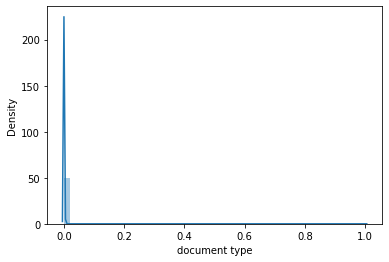

In [54]:
# Distribution Diagram of our 'document type' feature.

sns.distplot(X_train['document type'])

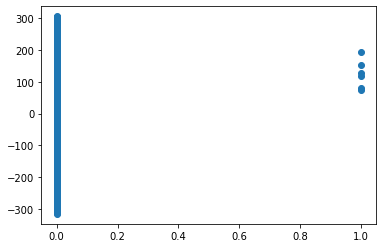

In [55]:
plt.scatter(X_train['document type'], y_train)
plt.show()

<AxesSubplot:xlabel='name_customer', ylabel='Density'>

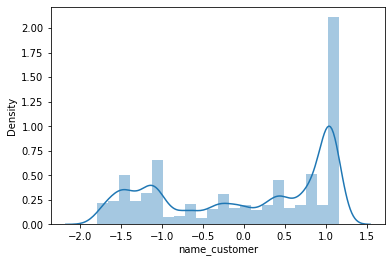

In [56]:
sns.distplot(X_train['name_customer'])

In [57]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,...,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
0,1,0.366490,1.061873,0,-0.278878,1,0,0.266748,0.788798,-0.586956,...,0.660849,1.787629,-1.318313,-0.322117,1.793801,-1.341391,-0.348748,1.792756,-1.294288,1
1,1,0.364241,-0.834721,0,-0.282487,1,0,-0.694494,-0.515488,-0.586956,...,0.660849,-0.498983,-0.055676,-1.427936,-0.495981,0.385024,0.750150,-0.496732,0.411591,1
2,1,0.365484,0.854229,0,-0.283010,1,0,-0.333473,-0.515488,-0.876575,...,0.132419,-0.784810,0.403465,-0.875027,-0.782204,0.615213,0.200701,-0.782918,0.639041,1
3,1,0.365711,-0.316915,1,-0.278169,1,0,-0.796309,-0.515488,-1.455813,...,-0.396010,-1.356463,0.747821,-0.322117,-1.354649,0.730307,-0.348748,-1.355290,0.752766,2
4,2,0.368669,-1.248271,0,-0.075192,1,0,0.396081,-1.074467,-1.455813,...,-0.924440,1.787629,1.551317,1.336610,-1.354649,-1.686674,-0.898197,-1.355290,-1.635464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,1,0.366490,1.059267,0,-0.282448,1,0,-0.361430,0.788798,-0.586956,...,0.132419,-0.498983,0.173895,-0.322117,-0.495981,0.269930,0.200701,-0.496732,0.297865,1
39987,1,0.366490,1.054922,0,-0.278980,1,0,-0.386422,0.788798,1.440376,...,1.717708,1.501803,0.862606,1.336610,1.507578,0.960496,1.849049,1.506570,0.980217,1
39989,1,0.366202,-1.386410,0,-0.280423,1,0,0.539497,-0.049672,0.571519,...,-0.924440,0.644323,0.288680,1.889519,0.648910,0.500118,-0.898197,0.648012,0.525316,1
39990,1,0.372214,-0.667911,1,-0.278046,1,0,-0.487756,-0.515488,-0.586956,...,0.132419,-1.070636,-1.662668,1.336610,-1.068427,-1.341391,-0.898197,-1.069104,-1.294288,2


## Feature Selection

In [58]:
# This piece of code displays the correlation matrix between the features.

X_train.corr()

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,...,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
business_code,1.000000,0.133693,-0.011964,0.006932,-0.540101,0.584717,-0.027908,-0.043370,0.515675,-0.018232,...,0.002672,-0.024923,0.000021,-0.006840,-0.024443,0.001170,0.020439,-0.025512,-0.002618,0.003757
cust_number,0.133693,1.000000,0.110922,-0.002100,-0.585519,0.610066,-0.028076,-0.027468,0.325588,-0.000945,...,0.019443,-0.006061,-0.014402,0.032211,-0.007245,-0.011106,0.030103,-0.008380,-0.022689,-0.004963
name_customer,-0.011964,0.110922,1.000000,-0.002293,-0.022915,0.025902,0.006636,-0.031174,0.151207,0.001766,...,0.076205,0.009293,0.000911,0.076108,0.008067,-0.001687,0.119654,0.007244,0.030318,-0.003661
buisness_year,0.006932,-0.002100,-0.002293,1.000000,-0.015152,0.015444,-0.005442,0.005095,-0.005577,-0.240879,...,-0.030779,-0.419237,0.015914,-0.025461,-0.429466,0.023179,-0.017509,-0.432952,0.022534,0.967303
doc_id,-0.540101,-0.585519,-0.022915,-0.015152,1.000000,-0.951215,0.352078,0.035978,-0.500398,0.009280,...,-0.002124,0.021638,0.023839,-0.005383,0.021406,0.012544,-0.014623,0.023075,0.023557,-0.010270
invoice_currency,0.584717,0.610066,0.025902,0.015444,-0.951215,1.000000,-0.047628,-0.042030,0.530973,-0.013698,...,0.005348,-0.026128,-0.017965,0.008944,-0.026970,-0.010865,0.015618,-0.028755,-0.022413,0.010328
document type,-0.027908,-0.028076,0.006636,-0.005442,0.352078,-0.047628,1.000000,-0.009998,-0.025353,-0.012212,...,0.009207,-0.010934,0.021613,0.010918,-0.014220,0.006700,-0.001031,-0.014230,0.007054,-0.005131
total_open_amount,-0.043370,-0.027468,-0.031174,0.005095,0.035978,-0.042030,-0.009998,1.000000,-0.135068,-0.001422,...,-0.004892,0.008492,0.012156,0.015795,0.007603,0.008206,0.005159,0.007802,0.029134,0.005832
cust_payment_terms,0.515675,0.325588,0.151207,-0.005577,-0.500398,0.530973,-0.025353,-0.135068,1.000000,-0.003913,...,0.054209,-0.009703,0.001049,0.050886,-0.008890,-0.004306,0.091340,-0.009560,-0.040267,-0.006717
post_month,-0.018232,-0.000945,0.001766,-0.240879,0.009280,-0.013698,-0.012212,-0.001422,-0.003913,1.000000,...,0.006566,0.583873,-0.081360,0.011487,0.589714,0.024371,-0.002625,0.586169,0.017639,-0.278593


In [59]:
# Next step is to remove the highly correlated features.

In [60]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)
#handling_correlation(X_train.copy(),0.80)

In [61]:
# storing highly correlated features in a variable. 
corr_features = handling_correlation(X_train.copy(),0.80)
corr_features

['baseline_create_date_year',
 'baseline_create_date_month',
 'document_create1_month',
 'invoice_currency',
 'document_create1_day',
 'baseline_create_date_day',
 'document_create_day']

In [62]:
# dropping all high correlated data from X_train

X_train = X_train.drop(corr_features, axis=1) 

In [63]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_month,document_create_weeksdays,document_create1_weeksdays
0,1,0.366490,1.061873,0,-0.278878,0,0.266748,0.788798,-0.586956,-0.372619,0.660849,1.787629,-0.322117,-0.348748
1,1,0.364241,-0.834721,0,-0.282487,0,-0.694494,-0.515488,-0.586956,0.403013,0.660849,-0.498983,-1.427936,0.750150
2,1,0.365484,0.854229,0,-0.283010,0,-0.333473,-0.515488,-0.876575,0.624622,0.132419,-0.784810,-0.875027,0.200701
3,1,0.365711,-0.316915,1,-0.278169,0,-0.796309,-0.515488,-1.455813,0.735427,-0.396010,-1.356463,-0.322117,-0.348748
4,2,0.368669,-1.248271,0,-0.075192,0,0.396081,-1.074467,-1.455813,-1.591470,-0.924440,1.787629,1.336610,-0.898197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,1,0.366490,1.059267,0,-0.282448,0,-0.361430,0.788798,-0.586956,0.292208,0.132419,-0.498983,-0.322117,0.200701
39987,1,0.366490,1.054922,0,-0.278980,0,-0.386422,0.788798,1.440376,0.957036,1.717708,1.501803,1.336610,1.849049
39989,1,0.366202,-1.386410,0,-0.280423,0,0.539497,-0.049672,0.571519,0.513817,-0.924440,0.644323,1.889519,-0.898197
39990,1,0.372214,-0.667911,1,-0.278046,0,-0.487756,-0.515488,-0.586956,-1.480665,0.132419,-1.070636,1.336610,-0.898197


In [64]:
dm = dm.drop(corr_features, axis=1)

In [65]:
corr_features = handling_correlation(X_val.copy(),0.80)

In [66]:
# dropping all high correlated data from X_val

X_val = X_val.drop(corr_features, axis=1)

In [67]:
corr_features = handling_correlation(X_test.copy(),0.80)

In [68]:
# dropping all high correlated data from X_test

X_test = X_test.drop(corr_features, axis=1)

<AxesSubplot:>

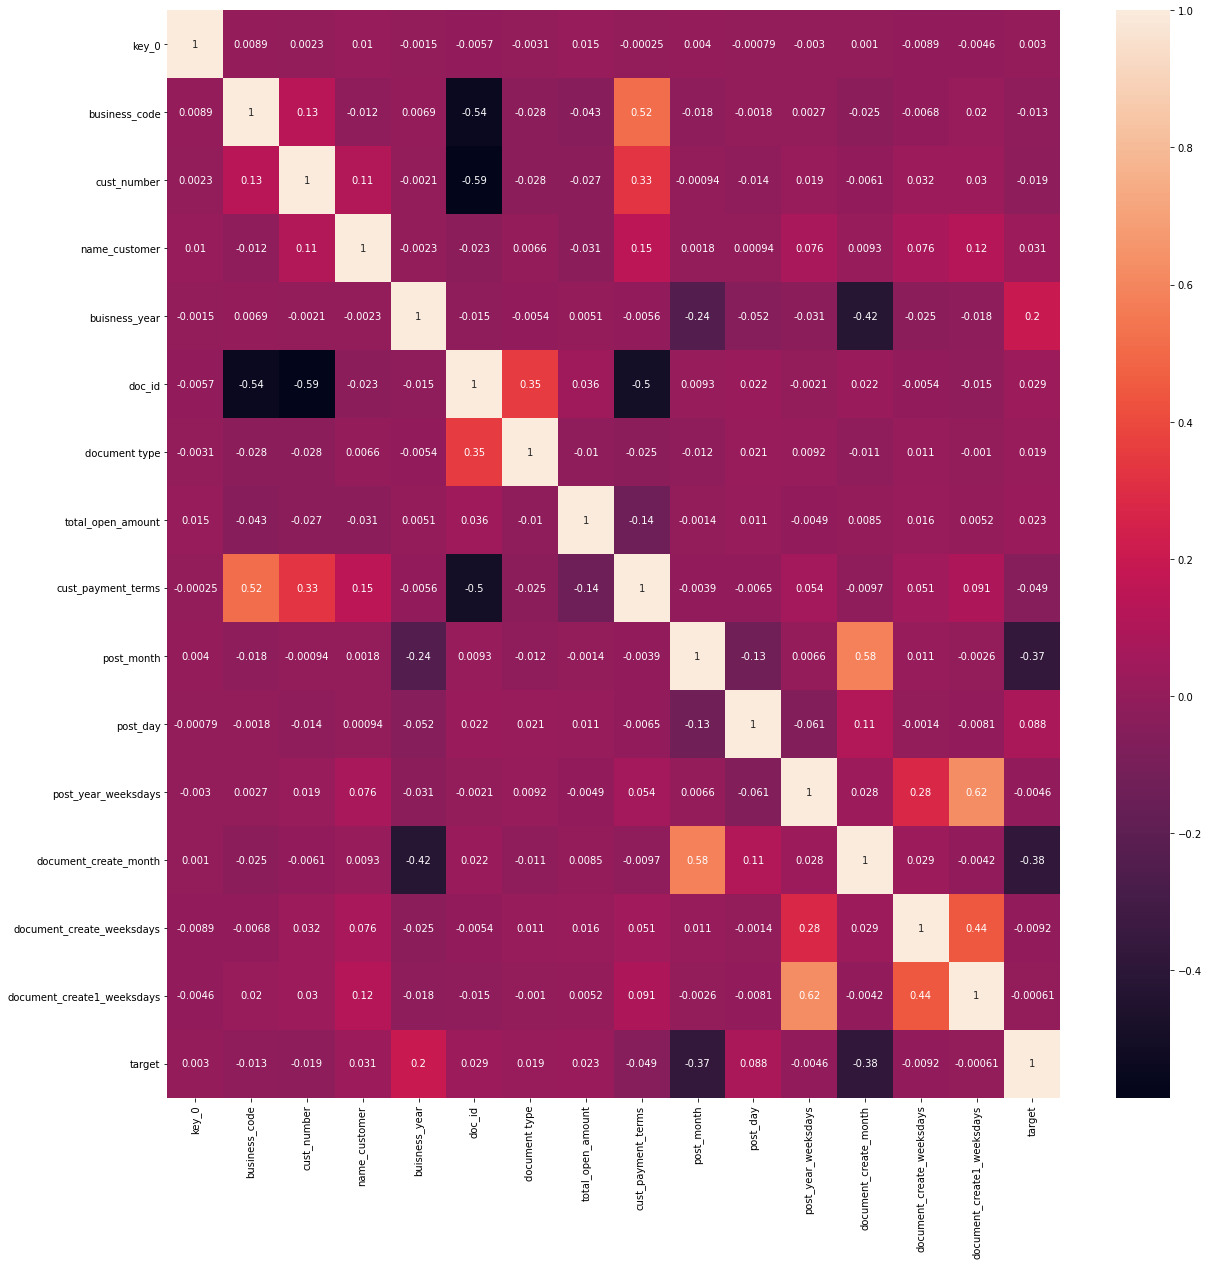

In [69]:
# This code will display the heat map. It describes the the correlation among the features. 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corrmat = X_train.merge(y_train, on = X_train.index).corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

<AxesSubplot:xlabel='target', ylabel='total_open_amount'>

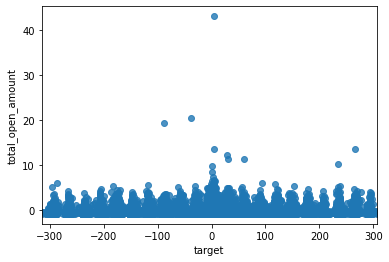

In [70]:
# This pot is between target vs Total_open_amount
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='total_open_amount')

<AxesSubplot:xlabel='target', ylabel='name_customer'>

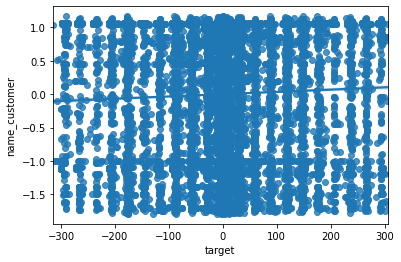

In [71]:
# This pot is between target vs name_customer

sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='name_customer')

In [72]:
# From the above the plot it is clear that feature 'name_customer' is not relevant and hence can be dropped.

X_test = X_test.drop('name_customer', axis=1)
X_train = X_train.drop('name_customer', axis=1)
X_val = X_val.drop('name_customer', axis=1)
dm = dm.drop('name_customer', axis=1)

In [73]:
# Drop the null columns

X_train = X_train.dropna()
X_test = X_test.dropna()
X_val = X_val.dropna()

## Modelling

In [74]:
# this is to import library from sklearn for the calculation of MSE and R2 Score

from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# I have tested my model on Linear Regression , Decision Tree and Random Forest
# Best Accuracy is coming for Random Forest.

#----Decision Tree----#
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [76]:
# predicted value of Validation set when model is trained on Decision Tree

predicted = tree_model.predict(X_val)
pd.DataFrame(zip(y_val, predicted), columns = ['actual', 'predicted'])

,actual,predicted
0,0,15.489247
1,114,51.459485
2,-5,-2.391447
3,144,81.330893
4,2,-2.391447
...,...,...
5406,0,4.636364
5407,0,4.636364
5408,3,57.154525
5409,1,4.636364


In [77]:
# MSE value for Decision Tree Model
mean_squared_error(y_val, predicted, squared=False)

73.82387250720016

In [78]:
# R2 score value for Decision Tree Model
r2_score(y_val, predicted)

0.35795690528459856

In [79]:
from sklearn.ensemble import RandomForestRegressor
  
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with X_train and y train
regressor.fit(X_train, y_train)  

predicted = regressor.predict(X_val)
pd.DataFrame(zip(y_val, predicted), columns = ['actual', 'predicted'])

,actual,predicted
0,0,10.000
1,114,17.290
2,-5,-4.920
3,144,101.700
4,2,-64.650
...,...,...
5406,0,12.710
5407,0,10.320
5408,3,2.410
5409,1,-0.675


In [80]:
mean_squared_error(y_val, predicted, squared=False)

75.39092231244776

## Bucketization

In [81]:
# Code for the bucketization

def bucketization(x):
    if x<=0:
        return('(< 0) Days')
    if x>0 and x<=15:
        return('(0-15) Days')
    elif x>15 and x<=30:
        return('(16-30) Days')
    elif x>30 and x<=45:
        return('(31-45) Days')
    elif x>45 and x<=60:
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [82]:
# Mapping of the predicted data into discrete value.

m = pd.Series([bucketization(x=predicted[i])  for i in range(len(predicted))])
#bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1 ,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}
bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}
m = m.map(bucket_mapper)
m.to_frame()
a1 = m.tail(20)

In [83]:
xy = y_test

In [84]:
xy= xy.reset_index(drop=True)
m = pd.Series([bucketization(x=xy[i])  for i in range(len(xy))])
#bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}
bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}
m = m.map(bucket_mapper)
m.to_frame()
a2 = m.tail(20)

In [85]:
pd.DataFrame(zip(a1, a2), columns = ['actual - Bucket', 'predicted - Bucket'])

,actual - Bucket,predicted - Bucket
0,0,0
1,2,0
2,1,0
3,6,0
4,1,6
5,2,2
6,0,6
7,0,0
8,1,5
9,4,0


## Working on Main Test Dataset

In [86]:
# This is the dataset which we seperated earlier because their 'Clear_date' values was null

dm

,business_code,cust_number,buisness_year,doc_id,document type,total_open_amount,cust_payment_terms,target,post_month,post_day,post_year_weeksdays,document_create_month,document_create_weeksdays,document_create1_weeksdays
5,0,140105686,0,2960632145,0,1269.317304,1,NaN,4,29,2,4,2,2
6,1,200553372,0,1930758667,0,44885.830000,11,NaN,6,4,3,4,1,0
7,1,200794332,0,1930709693,0,71368.340000,13,NaN,3,27,4,3,4,4
9,1,200974851,0,1930759609,0,3399.340000,11,NaN,7,4,5,4,1,1
11,0,140104409,0,2960621515,0,3097.946736,1,NaN,3,16,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,1,200769623,0,1930855265,0,23159.910000,24,NaN,4,5,6,5,6,0
49994,1,200786288,0,1930774216,0,14170.620000,16,NaN,12,4,4,4,4,6
49996,1,200020431,0,1930599470,0,421.080000,28,NaN,4,3,4,3,2,2
49997,1,100021540,0,1930728997,0,66235.880000,4,NaN,2,4,1,4,3,3


In [87]:
# cust_number contains the ambiguity hence i am trying to remove that 

dm['cust_number'] = pd.to_numeric(dm['cust_number'],errors='coerce') # invalid parsing will be set as NaN
dm=dm.dropna(subset=['cust_number'],axis=0)

In [88]:
XX = dm.drop('target',axis=1)
yy = dm['target']
XX.shape

(9872, 13)

In [89]:
XX

,business_code,cust_number,buisness_year,doc_id,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_month,document_create_weeksdays,document_create1_weeksdays
5,0,140105686.0,0,2960632145,0,1269.317304,1,4,29,2,4,2,2
6,1,200553372.0,0,1930758667,0,44885.830000,11,6,4,3,4,1,0
7,1,200794332.0,0,1930709693,0,71368.340000,13,3,27,4,3,4,4
9,1,200974851.0,0,1930759609,0,3399.340000,11,7,4,5,4,1,1
11,0,140104409.0,0,2960621515,0,3097.946736,1,3,16,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,1,200769623.0,0,1930855265,0,23159.910000,24,4,5,6,5,6,0
49994,1,200786288.0,0,1930774216,0,14170.620000,16,12,4,4,4,4,6
49996,1,200020431.0,0,1930599470,0,421.080000,28,4,3,4,3,2,2
49997,1,100021540.0,0,1930728997,0,66235.880000,4,2,4,1,4,3,3


In [90]:
dm.shape

(9872, 14)

In [98]:
# Applying the model on new Dataset i,e XX 
predicted = regressor.predict(XX)
#pd.DataFrame(zip(y_val, predicted), columns = ['actual', 'predicted'])
df = pd.DataFrame(predicted, columns=['delay_predicted'])
df

,delay_predicted
0,22.15
1,2.17
2,2.78
3,-2.06
4,26.67
...,...
9867,5.81
9868,2.78
9869,2.78
9870,2.78


In [92]:
# dividing into ranges.
mmm= pd.Series([bucketization(x=predicted[i])  for i in range(len(predicted))])
bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}
mmmm = mmm.map(bucket_mapper)
mmm

0       (16-30) Days
1        (0-15) Days
2        (0-15) Days
3         (< 0) Days
4       (16-30) Days
            ...     
9867     (0-15) Days
9868     (0-15) Days
9869     (0-15) Days
9870     (0-15) Days
9871     (0-15) Days
Length: 9872, dtype: object

In [93]:
main_data['cust_number'] = pd.to_numeric(main_data['cust_number'],errors='coerce') # invalid parsing will be set as NaN
main_data=main_data.dropna(subset=['cust_number'],axis=0)

In [94]:
# Changing the Series mmm to dataframe

mmm = mmm.to_frame(name='bucket')

In [95]:
#resetting index because we need to concat the 2 dataframes
main_data.reset_index(drop=True, inplace=True) 
mmm.reset_index(drop=True, inplace=True)

# Appending the 'mmm' to the main_data
main_data=pd.concat([main_data, mmm], axis=1)

In [96]:
# This is the final test dataframe containing ageing Bucket .

main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,bucket
0,CA02,140105686.0,SYSC associates,NaN,2020,2960632145,29-04-2020,20200429,20200429,20200517,CAD,RV,1,NaN,1934.64,20200507,CA10,2.960632e+09,1,(16-30) Days
1,U001,200553372.0,VITC in,NaN,2020,1930758667,06-04-2020,20200407,20200406,20200421,USD,RV,1,NaN,44885.83,20200406,NAA8,1.930759e+09,1,(0-15) Days
2,U001,200794332.0,COST foundation,NaN,2020,1930709693,27-03-2020,20200327,20200327,20200411,USD,RV,1,NaN,71368.34,20200327,NAAX,1.930710e+09,1,(0-15) Days
3,U001,200974851.0,RESTA associates,NaN,2020,1930759609,07-04-2020,20200407,20200407,20200422,USD,RV,1,NaN,3399.34,20200407,NAA8,1.930760e+09,1,(< 0) Days
4,CA02,140104409.0,LOB co,NaN,2020,2960621515,16-03-2020,20200317,20200316,20200328,CAD,RV,1,NaN,4721.76,20200318,CA10,2.960622e+09,1,(16-30) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,U001,200769623.0,WAL-MAR foundation,NaN,2020,1930855265,04-05-2020,20200503,20200504,20200519,USD,RV,1,NaN,23159.91,20200504,NAH4,1.930855e+09,1,(0-15) Days
9868,U001,200786288.0,FAMILY,NaN,2020,1930774216,12-04-2020,20200410,20200412,20200427,USD,RV,1,NaN,14170.62,20200412,NAC6,1.930774e+09,1,(0-15) Days
9869,U001,200020431.0,DEC corp,NaN,2020,1930599470,04-03-2020,20200304,20200304,20200324,USD,RV,1,NaN,421.08,20200301,NAM4,1.930599e+09,1,(0-15) Days
9870,U001,100021540.0,MASTER co,NaN,2020,1930728997,02-04-2020,20200402,20200402,20200412,USD,RV,1,NaN,66235.88,20200402,NA10,1.930729e+09,1,(0-15) Days


In [99]:
main_data = main_data.reset_index(drop = True)
main_data['Delay_days'] = df['delay_predicted']

In [100]:
# Changing the datatype of the due_in_day feature.
main_data['due_in_date_1'] = pd.to_datetime(main_data['due_in_date'], format='%Y%m%d') 

In [102]:
# Adding delay day to the due in date to get the predicted day.

temp = main_data['Delay_days'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
main_data['delay_predicted'] = main_data['due_in_date_1'] + temp

In [103]:
# This is the main datagram. It contains the bucket and Delay predicted as required.

main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,bucket,due_in_date_1,Delay_days,delay_predicted
0,CA02,140105686.0,SYSC associates,NaN,2020,2960632145,29-04-2020,20200429,20200429,20200517,...,NaN,1934.64,20200507,CA10,2.960632e+09,1,(16-30) Days,2020-05-17,22.15,2020-06-09
1,U001,200553372.0,VITC in,NaN,2020,1930758667,06-04-2020,20200407,20200406,20200421,...,NaN,44885.83,20200406,NAA8,1.930759e+09,1,(0-15) Days,2020-04-21,2.17,2020-04-24
2,U001,200794332.0,COST foundation,NaN,2020,1930709693,27-03-2020,20200327,20200327,20200411,...,NaN,71368.34,20200327,NAAX,1.930710e+09,1,(0-15) Days,2020-04-11,2.78,2020-04-14
3,U001,200974851.0,RESTA associates,NaN,2020,1930759609,07-04-2020,20200407,20200407,20200422,...,NaN,3399.34,20200407,NAA8,1.930760e+09,1,(< 0) Days,2020-04-22,-2.06,2020-04-20
4,CA02,140104409.0,LOB co,NaN,2020,2960621515,16-03-2020,20200317,20200316,20200328,...,NaN,4721.76,20200318,CA10,2.960622e+09,1,(16-30) Days,2020-03-28,26.67,2020-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,U001,200769623.0,WAL-MAR foundation,NaN,2020,1930855265,04-05-2020,20200503,20200504,20200519,...,NaN,23159.91,20200504,NAH4,1.930855e+09,1,(0-15) Days,2020-05-19,5.81,2020-05-25
9868,U001,200786288.0,FAMILY,NaN,2020,1930774216,12-04-2020,20200410,20200412,20200427,...,NaN,14170.62,20200412,NAC6,1.930774e+09,1,(0-15) Days,2020-04-27,2.78,2020-04-30
9869,U001,200020431.0,DEC corp,NaN,2020,1930599470,04-03-2020,20200304,20200304,20200324,...,NaN,421.08,20200301,NAM4,1.930599e+09,1,(0-15) Days,2020-03-24,2.78,2020-03-27
9870,U001,100021540.0,MASTER co,NaN,2020,1930728997,02-04-2020,20200402,20200402,20200412,...,NaN,66235.88,20200402,NA10,1.930729e+09,1,(0-15) Days,2020-04-12,2.78,2020-04-15
